In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## 2.2 การถดถอยลอจิสติก

พื้นฐานสำคัญทางคณิตศาสตร์ที่ช่วยทำให้เข้าใจการจำแนกประเภททวิภาคโดยโครงข่ายประสาทเทียมได้ดีขึ้นคือ การถดถอยลอจิสติก 
(logistic regression) ซึ่งแตกต่างจากการถดถอยเชิงเส้นในหัวข้อก่อนหน้านี้ 
ที่เป็นการพยากรณ์ค่าของตัวแปรเลขจำนวนจริง การถดถอยลอจิสติกเป็นการพยากรณ์ความน่าจะเป็นของ
ผลลัพธ์ในช่วง [0,1] ซึ่งสอดคล้องกับปัญหาการจำแนกทวิภาค 

ก่อนจะเริ่มต้นศึกษาการถดถอยลอจิสติก จำเป็นต้องกล่าวถึงสัญกรณ์ที่ใช้ในการกำหนดขนาดของอินพุตและเอาต์พุต 
พิจารณาตัวอย่างปัญหาการจำแนกทวิภาคของข้อมูลภาพดังแสดงในรูปที่ 2.1 โจทย์คือต้องการตรวจสอบภาพอินพุตหนึ่งและให้เอาต์พุตเป็น 
0 หากไม่มีแมวในภาพ หรือเป็น 1 หากตรวจพบแมว 

<p />  
<p align="center">
<img src="https://drive.google.com/uc?id=1Jk4KeX6OeIuzvGO9i_Nj0940KBtidAin" width=600 />
</p>
<div align="center">รูปที่ 2.1 การจัดรูปแบบข้อมูลภาพในการจำแนกทวิภาค</div>

สมมุติว่าภาพมีขนาดความกว้างและความยาวเท่ากับ 64 พิกเซล และเป็นภาพสีที่แทนด้วย RGB (แดง เขียว น้ำเงิน) 
ดังนั้นจำนวนจุดข้อมูลทั้งหมดของอินพุตคือ 64 x 64 x 3 = 12,288 จุด ในการประมวลผลโดยโครงข่ายประสาทเทียม 
จะจัดเรียงจุดข้อมูลเหล่านี้เป็นเวกเตอร์อินพุต เริ่มจากจุดสมาชิกของสีแดง ต่อด้วยสีเขียว และสีน้ำเงิน ดังในรูปที่ 2.1 

ในการกำหนดสัญกรณ์ที่ใช้ในหนังสือนี้ สำหรับข้อมูลตัวอย่างหนึ่งภาพ $(x,y)$ ประกอบด้วยภาพอินพุต $X \in \mathbf{R}^{n_x}$ 
และเลเบล $Y \in \{0,1\}$ สำหรับกรณีภาพไม่มีหรือมีแมว กำหนดจำนวนข้อมูลที่ใช้ในการฝึก $m$ ตัวอย่างเขียนได้ในรูป 
$(x^{(1)},y^{(1)}),(x^{(2)},y^{(2)}),\ldots,(x^{(m)},y^{(m)})$ 
โดยสังเกตว่าจะใช้เลขยกกำลังในวงเล็บแทนดัชนีของตัวอย่าง 

ในการฝึกข้อมูลจำนวน $m$ ตัวอย่าง นิยามเมทริกซ์อินพุต $X \in \mathbf{R}^{n_x \times m}$

$$
X = \begin{bmatrix}
\vdots & \vdots & \vdots & \vdots \\
X^{(1)} & X^{(2)} & \ldots & X^{(m)} \\
\vdots & \vdots & \vdots & \vdots \\
\end{bmatrix} \tag{2.1}
$$

และเวกเตอร์เอาต์พุต $Y \in \mathbf{R}^{1 \times m}$

$$
Y = \begin{bmatrix} 
y^{(1)} & y^{(2)} & \ldots & y^{(m)} 
\end{bmatrix} \tag{2.2}
$$

ดังนั้นสำหรับสัญกรณ์ที่กำหนดนี้ สามารถสรุปปัญหาการถดถอยลอจิสติกได้คือ สำหรับข้อมูลอินพุต $X \in \mathbf{R}^{n_x}$ ตัวอย่างหนึ่ง เช่นรูปภาพที่ต้องการตัดสินว่ามีแมวอยู่หรือไม่ 
ต้องการให้ขั้นตอนวิธีพยากรณ์ผลลัพธ์ $\hat{y} = P(y=1|x)$ คือความน่าจะเป็นที่ภาพนี้จะเป็นภาพแมว 

ในการคำนวณเอาต์พุตจากพารามิเตอร์ของขั้นตอนวิธีคือ $w \in \mathbf{R}^{n_x}$ และ $b \in \mathbf{R}$ ต้องการประมาณค่า $\hat{y}$ 
พบว่าแนวทางอย่างง่ายคือใช้ฟังก์ชันสัมพรรค $\hat{y} = w^Tx + b$ ไม่เหมาะสมเนื่องจากไม่สามารถจำกัดเอาต์พุตให้อยู่ในช่วง 0 - 1 ได้ 
วิธีแก้คือส่งเอาต์พุตผ่านฟังก์ชันกระตุ้นแบบไม่เป็นเชิงเส้น 

$$
\hat{y} = \sigma(w^Tx + b) \tag{2.3}
$$

โดยฟังก์ชันซิกมอยด์ $\sigma()$ มีนิยามดังนี้

$$
\sigma(z) = \frac{1}{1+e^{-z}} \tag{2.4}
$$

สามารถพล็อตกราฟของ $\sigma()$ โดยโค้ดไพธอนได้ดังรูปที่ 2.2 

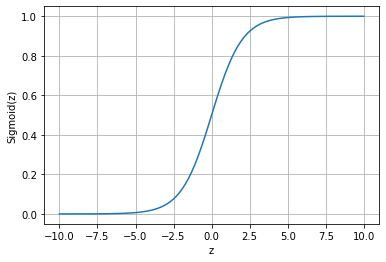

In [3]:
z = np.linspace(-10, 10, 100)
y = 1/(1 + np.exp(-z))
  
plt.plot(z,y)
plt.xlabel("z")
plt.ylabel("Sigmoid(z)")
plt.grid() 
plt.show()

รูปที่ 2.2 กราฟของฟังก์ชันซิกมอยด์

ทดลองเปลี่ยนย่านของตัวแปร $z$ ให้กว้างขึ้น จะพบว่าเมื่อ $z$ มีค่ามาก $\sigma(z)$ จะลู่เข้าสู่ค่า 1 ส่วนเมื่อ $z$ มีค่ามากทางด้านลบ 
$\sigma(z)$ จะลู่เข้าสู่ค่า 0 ดังนั้นการประมาณค่าความน่าจะเป็นโดย (2.3) จึงมีค่าอยู่ในช่วง $[0,1]$ ตามต้องการ

### 2.2.1 ฟังก์ชันมูลค่า

สรุปโจทย์ปัญหาของการถดถอยลอจิสติกได้ว่า เมื่อกำหนดข้อมูล $(x^{(1)},y^{(1)}),(x^{(2)},y^{(2)}),\ldots,(x^{(m)},y^{(m)})$ 
ต้องการพยากรณ์ $\hat{y}^{(i)} \approx y^{i}$ โดย $\hat{y}^{(i)} = \sigma(w^Tx^{(i)} + b)$ 
และ $\sigma(z^{(i)}) = \frac{1}{1+e^{-z^{(i)}}}$

ก่อนที่จะฝึกขั้นตอนวิธี จะต้องนิยามฟังก์ชันมูลค่า (cost function) โดยเริ่มจากหาฟังก์ชันที่คำนวณค่าผิดพลาด เรียกว่าฟังก์ชันการสูญเสีย 
(loss function) ซึ่งเป็นตัวชี้วัดว่าการพยากรณ์ใกล้เคียงมากน้อยเพียงใด ตัวอย่างหนึ่งของฟังก์ชันการสูญเสียที่ใช้ในการพยากรณ์รูปแบบอื่นคือค่าผิดพลาดกำลังสอง 
$\mathcal{L}(\hat{y},y)=\frac{1}{2}(\hat{y}-y)^2$ แต่จะพบว่าไม่เหมาะสมสำหรับปัญหาการถดถอยลอจิสติกเพราะทำให้การหาค่าเหมาะที่สุดไม่เป็นแบบคอนเวกซ์
ผลคือไม่สามารถหาค่าต่ำสุดครอบคลุม (global minimum) ของฟังก์ชันได้ 

ดังนั้นสำหรับปัญหาการถดถอยลอจิสติกจะใช้ฟังก์ชันการสูญเสียที่ทำให้การหาค่าเหมาะที่สุดเป็นแบบคอนเวกซ์ นิยามได้เป็นดังนี้

$$
\mathcal{L}(\hat{y},y)= -(y\; log \hat{y}+(1-y)log (1-\hat{y})) \tag{2.5}
$$

เมื่อลองวิเคราะห์แบบง่ายจะเข้าใจว่าทำไมฟังก์ชันนี้ถึงมีความเหมาะสม ในกรณี $y = 1$ ฟังก์ชันการสูญเสียจะลดเหลือ 
$\mathcal{L}(\hat{y},y)= -log \hat{y}$ หากต้องการลดค่าการสูญเสียเหลือน้อยสุด $log \hat{y}$ จะต้องมีค่ามาก 
กล่าวคือ $\hat{y}$ มีค่ามาก แต่ค่าสูงสุดของฟังก์ชันซิกมอยด์คือ 1 ดังนั้น $\hat{y} \rightarrow 1$ ส่วนในกรณี $y = 0$ 
จะได้ว่า $\mathcal{L}(\hat{y},y)= -log (1- \hat{y})$ ค่าการสูญเสียจะน้อยเมือ $log (1 - \hat{y})$ มีค่ามาก คือ 
$\hat{y}$ มีค่าน้อย ซึ่งจากค่าน้อยสุดของฟังก์ชันซิกมอยด์ $\hat{y} \rightarrow 0$

สังเกตว่าฟังก์ชันการสูญเสียนี้ถูกนิยามสำหรับข้อมูลการฝึกเพียงตัวอย่างเดียว เราต้องการนิยามฟังก์ชันมูลค่าสำหรับเซตข้อมูลการฝึกทั้งหมด

$$
J(w,b) = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(\hat{y}^{(i)}, y^{(i)}) = -\frac{1}{m}\sum_{i=1}^m [y^{(i)} log \hat{y}^{(i)}+(1-y^{(i)})log (1-\hat{y}^{(i)})] \tag{2.6}
$$

ในส่วนท้ายของหัวข้อย่อยนี้จะอธิบายเพิ่มเติมสำหรับผู้อ่านที่สนใจที่มาของฟังก์ชันการสูญเสียและฟังก์ชันมูลค่าสำหรับปัญหาการถดถอยลอจิสติก ในการพยากรณ์เอาต์พุต 
$\hat{y} = \sigma(w^Tx+b)$ ตีความได้ว่า $\hat{y} = p(y=1|x)$ คือความน่าจะเป็นที่จะได้ค่าเอาต์พุตเป็น 1 สำหรับอินพุตที่กำหนด 
หรืออาจกล่าวได้ว่าสำหรับค่า $y \in \{0, 1\}$

$$
y = 1 \rightarrow p(y|x) = \hat{y} 
$$

$$
y = 0 \rightarrow p(y|x) = 1 - \hat{y}
$$

ต้องการรวมสองเงื่อนไขนี้ให้อยู่ในสมการเดียวกัน จะเขียนได้เป็นดังนี้

$$
p(y|x) = \hat{y}^y(1-\hat{y})^{(1-y)}
$$

ตรวจสอบได้โดยการแทนค่า $y \in \{0, 1\}$ ในขั้นตอนต่อมาพิจารณาฟังก์ชัน log() ที่เป็นแบบฟังก์ชันทางเดียว (monotonic) และมีคุณสมบัติ

$$
log \; p(y|x) = log \; (\hat{y}^y(1-\hat{y})^{(1-y)}) = y\; log \hat{y}+(1-y)log (1-\hat{y})
$$

ซึ่งสอดคล้องกับพจน์ทางด้านขวาของฟังก์ชันการสูญเสีย (2.5) การที่ใช้เป็นค่าลบเนื่องจากในการฝึกต้องการให้ฟังก์ชันมีค่าน้อยสุด 
เป็นผลทำให้ค่าลอการิทึมของความน่าจะเป็นมีค่ามากสุด 

จากฟังก์ชันการสูญเสียของหนึ่งตัวอย่างสามารถขยายไปสู่ฟังก์ชันมูลค่าของตัวอย่างทั้งหมด พิจารณาความน่าจะเป็นของเลเบลทั้งหมดในการฝึก 
เขียนแทนโดย $p(Y|X)$ ที่ต้องการทำให้มีค่ามากสุด

$$
p(Y|X) = \prod_{i=1}^m\; p(y^{(i)}|x^{(i)})
$$

ใส่ฟังก์ชันลอการิทึมทั้งสองด้านไม่ทำให้การหาค่าเหมาะที่สุดเปลี่ยน เพราะ log() เป็นฟังก์ชันทางเดียว

$$
log \;p(Y|X) = log \; \prod_{i=1}^m\; p(y^{(i)}|x^{(i)}) = \sum_{i=1}^m\; log \; p(y^{(i)}|x^{(i)}) = -\sum_{i=1}^m \mathcal{L}(\hat{y}^{(i)}, y^{(i)})
$$

โดยใช้คุณสมบัติลอการิทึมของผลคูณเท่ากับผลบวกของลอการิทึม ดังนั้นจึงเป็นที่มาของฟังก์ชันมูลค่า (2.6) 
โดยละทิ้งเครื่องหมายลบเนื่องจากการต้องการลดค่า $J(w,b)$ เพื่อเพิ่มค่าความน่าจะเป็น $p(Y|X)$ สำหรับการเพิ่มพจน์ $1/m$ 
ก็เพื่อความเหมาะสมในการปรับมาตราส่วนเท่นั้น โดยไม่มีผลกับขั้นตอนวิธีการหาค่าเหมาะที่สุด

### 2.2.2 ขั้นตอนวิธีลดค่าเกรเดียนต์

หลังจากที่ได้นิยามฟังก์ชันมูลค่าแล้ว การฝึกโครงข่ายประสาทเทียมเพื่อเรียนรู้การจำแนกกระทำได้โดยใช้ขั้นตอนวิธีหาค่าเหมาะที่สุดเพื่อลดค่าของฟังก์ชันมูลค่า (2.6) 
กล่าวคือ ต้องการหาค่า $w,b$ เพื่อลดค่า $J(w,b)$ ให้เหลือน้อยที่สุด ขั้นตอนวิธีรูปแบบหนึ่งที่เป็นพื้นฐา่นและเข้าใจได้ง่ายเรียกว่า การลดค่าเกรเดียนต์ (gradient descent) 

ในความเป็นจริง มิติของ $J(w,b)$ ขึ้นกับข้อมูล แต่เพื่อให้มองเห็นภาพจะแสดงโดยฟังก์ชันคอนเว็กซ์ใน 3 มิติดังเช่นในรูปที่ 2.2 
ก่อนเริ่มต้นการฝึก $J(w,b)$ ถูกตั้งค่าเป็นจุดใดๆ บนพื้นที่ผิวของกราฟ 
(แสดงโดยตัวอักษร A ในรูปที่ 2.2) ในแต่ละขั้น ค่าเกรเดียนต์หรือความชันจะถูกคำนวณและขั้นตอนวิธีจะปรับตำแหน่งของ $J(w,b)$ 
ในทิศทางตรงกันข้ามกับค่าความชันสูงสุด เปรียบได้กับการไต่ลงจากหน้าผาในทิศทางที่ชันที่สุดนั่นเอง ดังนั้นหากฟังก์ชันเป็นแบบคอนเวกซ์ 
ค่าของ $J(w,b)$ จะเคลื่อนที่ลงจนในที่สุดเข้าสู่จุด O ซึ่งเป็นค่าต่ำสุดครอบคลุม

<p />  
<p align="center">
<img src="https://drive.google.com/uc?id=1A8wHCD7JVaZQias8Rf-UKvr18--EMvSe" width=600 />
</p>
<div align="center">รูปที่ 2.2 การทำงานของขั้นตอนวิธีลดค่าเกรเดียนต์</div>

ในการอธิบายการทำงานของการลดค่าเกรเดียนต์ให้เข้าใจได้ง่ายขึ้น จะลดมิติของฟังก์ชันมูลค่าลงเหลือ 2 มิติโดยพิจารณาเพียงพารามิเตอร์ 
$w$ เท่านั้นดังแสดงในรูปที่ 2.3 ขั้นตอนวิธีสำหรับปรับค่าพารามิเตอร์จะอยู่ในรูป

*Repeat :*
$$
w := w - \alpha \; dw \tag{2.7}
$$

<p />  
<p align="center">
<img src="https://drive.google.com/uc?id=1uCRs0tac9Wm5q_I3G0BILp1y47AherL2" width=600 />
</p>
<div align="center">รูปที่ 2.3 ขั้นตอนวิธีลดค่าเกรเดียนต์ใน 2 มิติ</div>

โดยลักษณะคำสั่งนี้เขียน $dw$ แทน $\frac{dJ(w)}{dw}$ เพื่อความง่าย เครื่องหมาย := 
คือการแทนค่าด้านซ้ายด้วยผลการคำนวณทางด้านขวา คำสั่งนี้จะถูกวนรอบจนกว่าค่าแตกต่างจากจุดต่ำสุดอยู่ในเกณฑ์ที่พอใจ 
ตัวแปร $\alpha$ แทนอัตราการเรียนรู้ซึ่งเป็นตัวควบคุมขนาดของขั้นในการปรับค่าแต่ละครั้งของการวนรอบ

**หมายเหตุ :** ในการตั้งชื่อตัวแปรสำหรับการแพร่กระจายย้อนหลัง (back propagation) 
สมมุติว่าตัวแปร $u,\; v$ คือเอาต์พุตที่เกิดขึ้นในระหว่างชั้นของโครงข่ายประสาทเทียมและ $J$ 
คือเอาต์พุตขั้นสุดท้าย เราจะใช้ชื่อ <code>du, dv</code>
แทน $\frac{dJ}{du},\; \frac{dJ}{dv}$ 
เนื่องจากส่วน $dJ$ จะอยู่ในทุกพจน์ที่ใช้กฎลูกโซ่ของแคลคูลัสในการคำนวณ
การตั้งชื่อยาวเช่น <code>dJdu, dJdv</code> ทำให้โค้ดอ่านยากขึ้น
    

พิจารณากรณีจุดเริ่มต้น L อยู่ทางซ้ายของจุดต่ำสุด O เมื่อคำนวณอนุพันธ์ (ความชัน) ที่จุด L จะได้ว่า $dw_L <0$ ดังนั้นจาก 
(2.6) ค่าของ $w$ จะถูกปรับให้มีค่าเพิ่มขึ้น คือเคลื่อนที่ในทิศทางด้านขวาตามลูกศรเข้าสู่จุด O สำหรับกรณีจุดเริ่มต้น R ที่อยู่ทางขวาของ O 
จะได้ $dw_R > 0$ ดังนั้น $w$ จะเคลื่อนที่ในทิศทางด้านซ้ายตามลูกศรเข้าสู่จุด O สรุปได้ว่าเมื่อ $J(w)$ เป็นฟังก์ชันคอนเวกซ์ 
ขั้นตอนวิธีลดค่าเกรเดียนต์จะทำให้ฟังก์ชันมูลค่าเข้าสู่จุดต่ำสุดครอบคลุมได้เสมอ 
เว้นแต่ว่าค่าของอัตราการเรียนรู้สูงเกินไปอาจทำให้ขั้นตอนวิธีไม่เสถียร

เราสามารถใช้คำอธิบายข้างต้นกับพารามิเตอร์ $b$ โดยขั้นตอนวิธี

*Repeat :* 
$$
b := b - \alpha \; db \tag{2.8}
$$

และขยายไปถึงกรณีหลายมิติทั่วไปที่ไม่สามารถแสดงรูปภาพได้ 
และสำหรับผู้ที่เคร่งในสัญกรณ์ทางคณิตศาสตร์ อนุพันธ์จะต้องถูกแทนด้วยอนุพันธ์ย่อย $\frac{\partial J(w,b)}{\partial w}$ 
และ $\frac{\partial J(w,b)}{\partial b}$ แต่ในการเขียนโค้ดเราจะยังคงแทนด้วย $dw$ และ $db$ ตามลำดับ 
ดังเช่นในขั้นตอนวิธี (2.6), (2.7)



### 2.2.3 การลดค่าเกรเดียนต์สำหรับการถดถอยลอจิสติก

ในหัวข้อย่อยนี้เป็นการศึกษาแนวทางการใช้ขั้นตอนวิธีลดค่าเกรเดียนต์สำหรับปัญหาการถดถอย โดยเริ่มต้นจากการเขียนโค้ดจากสมการคณิตศาสตร์โดยตรง 
ในการพัฒนาโครงข่ายประสาทเทียมขั้นพื้นฐานจะใช้เครื่องมือที่เรียกว่าแผนภาพเชิงคำนวณ (computational graph) 
ซึ่งมีข้อดีคือช่วยทำให้เข้าใจการไหลทั้งด้านเดินหน้าและย้อนหลังได้ง่าย (ถึงแม้ว่า TF เวอร์ชัน 2.x จะไม่ได้ใช้เป็นเครื่องมือหลักแล้วก็ตาม) 
เพื่อให้เข้าใจถึงคณิตศาสตร์ภายในของโครงข่ายประสาทเทียมและการเรียนรู้เชิงลึกดีขึ้น เราจะลองเขียนโค้ดโดยใช้แผนภาพเชิงคำนวณ

ต้องการให้สัญกรณ์สอดคล้องกับชื่อตัวแปรในโปรแกรม โดยหลีกเลี่ยงสัญลักษณ์พิเศษเช่น $\hat{y}$ เราจะกำหนดโดยใช้อักขระดังนี้
$$
z = w^Tx + b \tag{2.9}
$$
$$
\hat{y} = a = \sigma(z) \tag{2.10}
$$
$$
\mathcal{L}(a,y) = -(y\;log(a) + (1-y)log(1-a)) \tag{2.11}
$$

ในการอธิบายจะใช้ ANN สองอินพุต ซึ่งเมื่อเข้าใจแล้วสามารถขยายไปยัง ANN ทั่วไปที่มีจำนวนอินพุตเท่ากับ
$n_x$ รูปที่ 2.4 แสดงแผนภาพเชิงคำนวณสำหรับ 1 ข้อมูลตัวอย่างที่จะใช้ในการเขียนโปรแกรม ประกอบด้วยการคำนวณในทิศทางข้างหน้า (2.9) - (2.11)
เพื่อหาค่าฟังก์ชันการสูญเสียจากอินพุตและพารามิเตอร์ของ ANN และการแพร่กระจายย้อนหลังเพื่อปรับค่าของพารามิเตอร์ 

<p />  
<p align="center">
<img src="https://drive.google.com/uc?id=1-Lvnj4KyFFT0o6Y4TnB57hf_N0gRVkfG" width=600 />
</p>
<div align="center">รูปที่ 2.4 แผนภาพเชิงคำนวณของโครงข่ายประสาทเทียม 2 อินพุต</div>

**หมายเหตุ :** การแสดงรายละเอียดของการแพร่กระจายย้อนกลับนี้จะค่อนข้างซับซ้อน ในทางปฏิบัติจะถูกจัดการโดยไลบรารีเช่น TF 

ในการคำนวณการแพร่กระจายย้อนหลังจะใช้หลักการของแคลคูลัสร่วมกับกฎลูกโซ่ 
เริ่มจากการหาอนุพันธ์ของฟังก์ชันการสูญเสีย (2.5) ทิ้งให้เป็นแบบฝึกหัดในการแสดงว่า

$$
\frac{d\mathcal{L}(a,y)}{da} = -\frac{y}{a} + \frac{1-y}{1-a} \tag{2.12}
$$

ในโค้ดจะเรียกตัวแปรนี้ว่า ```da``` ต่อมาแพร่กระจายค่านี้ย้อนหลังจะได้ว่า

$$
d\frac{d\mathcal{L}(a,y)}{dz} = \frac{\mathcal{L}(a,y)}{da}\frac{da}{dz} = a-y \tag{2.13}
$$

โดยสามารถตรวจสอบได้โดยใช้ (2.12) ร่วมกับ $\frac{da}{dz} = a(1-a)$ ตั้งชื่อตัวแปร <code>dz</code>สำหรับ (2.13) 
สุดท้ายคือการแพร่กระจายย้อนกลับไปยัง 
$\frac{\partial \mathcal{L}(a,y)}{\partial w_1}, \; \frac{\partial\mathcal{L}(a,y)}{\partial w_2}, \; \frac{\partial \mathcal{L}(a,y)}{\partial b}$
 ตั้งชื่อตัวแปรว่า <code>dw1, dw2, db</code> ตามลำดับ ได้ความสัมพันธ์ดังนี้
```python
dw1 = x1dz
dw2 = x2dz
db = dz
```
โดย <code>dz</code> คำนวณได้จาก (2.13) หลังจากนั้นอัพเดทค่าของตัวแปร
```python
w1 := w1 - αdw1
w2 := w2 - αdw2
b := b - αdb
```
โดย α คือค่าอัตราการเรียนรู้ สังเกตว่าโค้ดตรงส่วนนี้เหมาะสมที่จะใช้การวนรอบในกรณีที่พารามิเตอร์มีจำนวนมากขึ้น

เมื่อได้โค้ดสำหรับข้อมูล 1 ตัวอย่างแล้ว สามารถขยายไปยังการเขียนโค้ดสำหรับตัวอย่างการฝึกทั้งหมดคือ $m$ ตัวอย่าง 
เมื่อพิจารณาอนุพันธ์ย่อยของฟังก์ชันมูลค่าเทียบพารามิเตอร์ $w_1$ จาก (2.6) จะได้ว่า
$$
\frac{\partial J(w,b)}{\partial w_1} = \frac{1}{m}\sum_{i=1}^m \frac{\partial \mathcal{L}(a^{(i)},y^{(i)})}{\partial w_1} \tag{2.14}
$$
ซึ่งพจน์อนุพันธ์ย่อยขวาสุดในเครื่องหมายรวมคือ <code>dw1</code> สำหรับตัวอย่าง $i$ ซึ่งเราได้แสดงความสัมพันธ์สำหรับอัพเดทแล้ว 
ในทำนองเดียวกันสามารถแสดงความสัมพันธ์สำหรับพารามิเตอร์ $b$ สรุปขั้นตอนวิธีสำหรับ $m$ ตัวอย่างจะมีโครงสร้างดังนี้

ตั้งค่าเริ่มต้นของตัวแปรที่ใช้ เช่นให้เป็นศูนย์ทั้งหมด
```python
J = 0; dw1 = 0; dw1 = 0; db = 0
```

สร้างเงื่อนไขการวนรอบสำหรับ $m$ ตัวอย่าง
```python
for i in range(m):
    zi = np.dot(w.T,x) + b
    ai = sigma(zi)
    J+= -(yi*np.log(ai) + (1-yi)*np.log(1-ai))
    dzi = ai - yi
    dw1 += x1i*dzi #---โค้ดส่วนนี้จะแทนด้วยการวนรอบเมื่อพารามิเตอร์มีจำนวนมาก---
    dw2 += x2i*dzi
    db += dzi
J /= m
dw1 /=m
dw2 /=m
db /= m
w1 -= α*dw1
w2 -= α*dw2
b -= α*db
```

**หมายเหตุ :** โค้ดนี้แสดงเพียงโครงสร้าง โดยละเว้นรายละเอียดของตัวแปรและฟังก์ชันที่ไม่ใช่เนื้อหาหลักของการอธิบาย


### 2.2.4 เพิ่มสมรรถนะการประมวลผลโดยการคำนวณในรูปเวกเตอร์

ข้อด้อยของการเขียนโค้ดจากแผนภาพการคำนวณโดยตรงดังเช่นด้านบนคือ ในกรณีทั่วไปจะต้องใช้เงื่อนไขการวนรอบ 2 วงคือ 
การวนรอบตามจำนวนของอินพุต $n_x$ (ในตัวอย่างด้านบนไม่มีเนื่องจากมีอินพุตเพียง 2 ตัว) และการวนรอบตามจำนวนตัวอย่าง $m$ 
การเขียนโค้ดในลักษณะวนรอบจะมีประสิทธิภาพต่ำและไม่สามารถใช้ประโยชน์จากฮาร์ดแวร์ประมวลผลเสริมเช่น GPU ได้อย่างเต็มที่ 
โดยเฉพาะเมื่อขนาดของ ANN และข้อมูลใหญ่ขึ้น ซึ่งเป็นแนวโน้มของการเรียนรู้เชิงลึกในปัจจุบัน 
วิธีการเขียนโค้ดที่มีสมรรถนะดีกว่าคือใช้การคำนวณในรูปเวกเตอร์ ดังเช่นบรรทัดที่มีคำสั่ง <code>np.dot(w,x)</code> 
เราสามารถใช้การเขียนในลักษณะนี้แทนเงื่อนไขการวนรอบได้

เริ่มต้นจากในส่วนการตั้งค่า กำหนดตัวแปร <code>dw</code> เป็นแบบเวกเตอร์

```python
dw = np.zeros((n_x,1))
```
ดังนั้นในส่วนการปรับค่าพารามิเตอร์สามารถเขียนได้เป็น

```python
dw += xi*dzi
```
โดยสังเกตว่าเครื่องหมาย ```*``` ในภาษาไพธอนคือการคูณแต่ละสมาชิกของเวกเตอร์ (element-by-element) 

สำหรับการวนรอบตามจำนวนตัวอย่าง $m$ ในส่วนการคำนวณข้างหน้า สามารถใช้เมทริกซ์ $X$ ตามนิยาม (2.1)
เพื่อคำนวณเวกเตอร์เอาต์พุต $z$ และ $a$ ได้ในขั้นตอนเดียว โดยสังเกตว่า
$$
Z = \begin{bmatrix}
z^{(1)} & z^{(2)} & \ldots & z^{(m)} 
\end{bmatrix} = w^TX + \begin{bmatrix}
b & b & \ldots &b \end{bmatrix} \tag{2.15}
$$
ซึ่งในการเขียนโค้ดภาษาไพธอน ใช้คำสั่ง
```python
Z = np.dot(w.T,X) + b
```
ซึ่งค่าของ <code>b</code> ที่เป็นตัวแปรสเกลาร์ จะถูกแพร่ (broadcast) เป็นเวกเตอร์ขนาด $1 \times m$ โดยอัตโนมัติ 
สำหรับเวกเตอร์ $a$ เราสามารถเขียนฟังก์ชัน sigmoid() ที่รับและคืนค่าเป็นเวกเตอร์ได้โดยง่าย 

ส่วนทางด้านการแพร่กระจายย้อนหลัง สามารถแสดงได้ว่าการคำนวณ <code>dw</code> และ <code>db</code>
ในรูปเวกเตอร์จะทำได้ดังนี้
```python
dw = (1/m)*np.dotX()
```

โค้ดที่เปลี่ยนเป็นใช้การคำนวณในรูปเวกเตอร์จะมีโครงสร้างดังนี้
```python
Z = np.dot(w.T,X) + b
A = sigmoid(Z)
dZ = A - Y
dw = (1/m)*np.dot(X,dZ.T)
db = (1/m)*np.sum(dZ)
w = w - α*dw
b = b - α*db
```

**ตัวอย่าง 2.2** 

ถึงแม้ว่าไลบรารีเช่น TF จะช่วยให้เราสร้างโมเดลสำหรับปัญหาการถดถอยลอจิสติกได้โดยง่าย 
แต่สำหรับผู้อ่านที่ต้องการศึกษาการเรียนรู้เชิงลึกอย่างถ่องแท้สามารถทดลองเขียนโค้ดตามที่ได้อธิบายเพื่อสร้างโมเดลสำหรับปัญหาพื้นฐาน
เช่นการจำแนกภาพว่ามีแมวอยู่หรือไม่ ซึ่งสามารถทดสอบกับข้อมูลภาพที่หาได้จากอินเทอร์เน็ต หรือลงทะเบียนเรียนออนไลน์คอร์ส 
Neural Networks and Deep Learning โดย Prof. Andrew Ng (DeepLearning.AI) ที่ coursera ซึ่งเป็นคอร์สแรกใน 5 คอร์สของชุด
Deep Learing Speciilizaion ที่ผู้เขียนได้ลงเรียนแล้วทั้งหมดและขอแนะนำว่าเป็นประโยชน์อย่างยิ่งในการศึกษาการเรียนรู้เชิงลึก 

เนื่องจากโค้ดและข้อมูลเป็นลิขสิทธิ์ของ Coursera จึงไม่สามารถนำเสนอในที่นี้ โดยจะกล่าวอธิบายเพียงภาพรวมเท่านั้น 
ในงานที่มอบหมายสำหรับสัปดาห์ที่สองของคอร์ส ผู้เรียนจะต้องเขียนโมเดลการถดถอยลอจิสติกและฝึกโดยใช้ข้อมูลภาพจำนวน 209 
ภาพที่คละกันระหว่างภาพที่มีแมวและไม่มีแมว และมีเลเบลกำกับดังเช่นในรูปที่ 2.5 ในชุดข้อมูลยังประกอบด้วยภาพสำหรับทดสอบ 50 ภาพ

<p />  
<p align="center">
<img src="https://drive.google.com/uc?id=1wKF-AGiV-40TmPLKFHtqs4X3LGNydlPm" width=600 />
</p>
<div align="center">รูปที่ 2.5 ข้อมูลภาพที่ใช้ในการฝึกโมเดล</div>

ผู้เรียนจะต้องเขียนโค้ดในฟังก์ชัน propagate() ตามแผนภาพการคำนวณทั้งทางข้างหน้าและย้อนหลัง 
และขั้นตอนวิธีลดค่าเกรเดียนต์ในฟังก์ชัน optimize() ตามโครงสร้างโค้ดที่แสดงด้านบน หลังจากนั้นสร้างฟังก์ชัน 
model() ที่รวมฟังก์ชันย่อยเข้าด้วยกันเป็นโมเดลสำหรับฝึก หากไม่มีข้อผิดพลาดในการเขียนโค้ด 
เมื่อทำการฝึกตามจำนวนรอบที่กำหนดเช่น 2000 รอบ จะได้เอาต์พุดดังแสดงในรูปที่ 2.6 
โดยจะเห็นว่าค่าเอาต์พุตจากฟังก์ชันมูลค่ามีค่าลดลงตามจำนวนรอบการฝึกตามที่แสดงในรูปที่ 2.7 หลังจาก 2000 รอบการฝึก 
ความแม่นยำจากการฝึกมีค่าสูงถึง 99 % ขณะที่ความแม่นยำจากการทดสอบได้เพียง 70 % 
ซึ่งจากตัวเลขนี้สามารถพิจารณาได้ว่าโมเดลมีการฟิตเกิน (overfitting) ซึ่งเราจะได้ศึกษาวิธีการแก้ไขต่อไป 

<p />  
<p align="center">
<img src="https://drive.google.com/uc?id=1qJkABh0lppOt_uVUppVUypO4wwxxHplP" width=600 />
</p>
<div align="center">รูปที่ 2.6 เอาต์พุตจากการฝึกโมเดล</div>

<p />  
<p align="center">
<img src="https://drive.google.com/uc?id=1jSvxHBjTczc8f8UF1oCjKCjbApriBACo" width=450 />
</p>
<div align="center">รูปที่ 2.7 ค่าของฟังก์ชันมูลค่าตามจำนวนรอบการฝึก</div>

หลังจากฝึกโมเดลแล้วคือขั้นตอนการตรวจสอบ โดยให้โมเดลพยากรณ์ภาพจากชุดทดสอบ 50 ภาพที่ไม่ได้ใช้ในการฝึก 
ผลการทดสอบพบว่ามีทั้งที่พยากรณ์ถูกและผิดดังแสดงในรูปที่ 2.8 โดยสอดคล้องกับค่าความแม่นยำที่คำนวณได้คือ 70 % 

<p />  
<p align="center">
<img src="https://drive.google.com/uc?id=155aA2r5gpL_BKKO7dC12hH8PGb1qJRpX" width=600 />
</p>
<div align="center">รูปที่ 2.8 ผลจากการพยากรณ์โดยโมเดลการถดถอยลอจิสติก</div>

ในส่วนท้ายของแบบฝึกหัดนี้ยังมีเซลล์สำหรับอัพโหลดรูปของเราเองเพื่อพยากรณ์ รูปที่ 2.9 คือแมวของผู้เขียนชื่อดอลล่าร์ 
โมเดลพยากรณ์ว่าไม่ใช่แมว สังเกตว่าภาพตัวอย่างนี้มีรายละเอียดค่อนข้างมาก ซึ่งต้องการโมเดลการจำแนกที่มีประสิทธิภาพมากกว่านี้

<p />  
<p align="center">
<img src="https://drive.google.com/uc?id=1crSrfTGHg87t597KZTuFqMFPzB8dev_A" width=600 />
</p>
<div align="center">รูปที่ 2.9 ผลการพยากรณ์ภาพถ่ายที่อัพโหลดเอง</div>

นอกจากนั้นยังมีการทดสอบเบื้องต้นเกี่ยวกับผลของอัตราการเรียนรู้ 3 ค่า $\alpha = 0.01, 0.001, 0.0001$ ผลที่ได้แสดงในรูปที่ 2.10 
จะเห็นว่าเมื่ออัตราการเรียนรู้มีค่าสูง  $\alpha = 0.01$ ทำให้ค่าของฟังก์ชันมูลค่าแกว่ง ซึ่งอาจจะลู่ออกได้ในที่สุด 
แต่สำหรับปัญหานี้กลับได้ค่ามูลค่าที่น้อยที่สุด เมื่อปรับอัตราการเรียนรู้น้อยลงทำให้ขั้นตอนวิธีไม่ได้ค่าน้อยที่สุด อย่างไรก็ตามกราฟนี้เป็นการทดสอบเบื้องต้นเท่านั้น 
การได้ฟังก์ชันมูลค่าน้อยสุดไม่ได้หมายความว่าเป็นโมเดลที่ดีที่สุดเพราะอาจเกิดการฟิตเกิน

<p />  
<p align="center">
<img src="https://drive.google.com/uc?id=1Wt1MmbiQZf1y_iqkYggbwC9YjWooI1VV" width=500 />
</p>
<div align="center">รูปที่ 2.10 ผลจากค่าอัตราการเรียนรู้</div>

ทดลองรันสมุดบันทึก Logistic_Regression_with_a_Neural_Network_mindset_v6a.ipynb 

<p align="center">
<img src="https://drive.google.com/thumbnail?id=13bzT7Rmy3bzvE7TiS0yfQo94kpxMuipF" alt="dewninja"/>
</p>
<div align="center">dew.ninja 2022</div>